In [1]:
#%pip install -U -q "google-generativeai>=0.8.3"
import typing_extensions as typing
import google.generativeai as genai
from IPython.display import HTML, Markdown, display
genai.configure(api_key='')
from typing_extensions import TypedDict, List
import json
import time
from tqdm import tqdm
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the output schema (without date)
class ThreatParser(TypedDict):
    description: str
    country_of_origin: List[str]
    country_of_target: List[str]
    energy_related: bool

# Instantiate the generative model
model = genai.GenerativeModel(
    'gemini-1.5-flash-latest',
    generation_config=genai.GenerationConfig(
        temperature=0.1,
        response_mime_type="application/json",
        response_schema=ThreatParser,
    )
)

# Input and output filepaths
input_filepath = "MITRE_ATT&CK_APT_Groups_Enhanced_Analysis.xlsx"
output_filepath = "MITRE_ATT_output.json"

def parse_threat_data(input_filepath, output_filepath):
    # Read the Excel file and convert it to a list of dicts
    try:
        df = pd.read_excel(input_filepath)
        data = df.to_dict(orient="records")
    except Exception as e:
        print(f"Error reading the Excel file: {e}")
        return

    # Load existing results if the output file exists
    try:
        with open(output_filepath, 'r') as f:
            parsed_data = json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        parsed_data = []

    # Use the description field from previous results to avoid duplicate processing
    processed_descriptions = {item["description"] for item in parsed_data}

    # Open the output file in write mode to save intermediate results
    with open(output_filepath, 'w') as f:
        for index, item in enumerate(tqdm(data, desc="Processing threats")):
            # Extract and clean the description from the Excel file
            description_text = str(item.get("Description", "")).strip()
            if not description_text or description_text in processed_descriptions:
                continue  # Skip if no description or already processed

            # Generate content using the model
            response = model.generate_content(description_text)
            time.sleep(7)  # Delay to avoid rapid API calls

            try:
                parsed_item = json.loads(response.text)
                # Store the original description
                parsed_item["description"] = description_text
                print(parsed_item)
            except json.JSONDecodeError as e:
                print(f"Error parsing Gemini API response: {e}\nDescription: {description_text}")
                parsed_item = {
                    "description": description_text,
                    "error": "Gemini API parsing failed"
                }

            parsed_data.append(parsed_item)
            # Save the intermediate results
            f.seek(0)
            json.dump(parsed_data, f, indent=4)
            f.truncate()

    print(f"Parsed data written to {output_filepath}")

# Uncomment the line below to run the parsing process.
parse_threat_data(input_filepath, output_filepath)


Processing threats:   1%|          | 1/163 [00:08<21:48,  8.07s/it]

{'country_of_origin': ['China'], 'description': 'admin@338 is a China-based cyber threat group. It has previously used newsworthy events as lures to deliver malware and has primarily targeted organizations involved in financial, economic, and trade policy, typically using publicly available RATs such as PoisonIvy, as well as some non-public backdoors.', 'energy_related': False}


Processing threats:   1%|          | 2/163 [00:16<21:43,  8.09s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Israel'], 'description': "Agrius is an Iranian threat actor active since 2020 notable for a series of ransomware and wiper operations in the Middle East, with an emphasis on Israeli targets. Public reporting has linked Agrius to Iran's Ministry of Intelligence and Security (MOIS).", 'energy_related': False}


Processing threats:   2%|▏         | 3/163 [00:24<21:37,  8.11s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['US'], 'description': 'Ajax Security Team is a group that has been active since at least 2010 and believed to be operating out of Iran. By 2014 Ajax Security Team transitioned from website defacement operations to malware-based cyber espionage campaigns targeting the US defense industrial base and Iranian users of anti-censorship technologies.', 'energy_related': False}


Processing threats:   2%|▏         | 4/163 [00:32<21:40,  8.18s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'Akira is a ransomware variant and ransomware deployment entity active since at least March 2023. Akira uses compromised credentials to access single-factor external access mechanisms such as VPNs for initial access, then various publicly-available tools and techniques for lateral movement. Akira operations are associated with "double extortion" ransomware activity, where data is exfiltrated from victim environments prior to encryption, with threats to publish files if a ransom is not paid. Technical analysis of Akira ransomware indicates multiple overlaps with and similarities to Conti malware.', 'energy_related': False}


Processing threats:   3%|▎         | 5/163 [00:51<31:41, 12.04s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['United States', 'United Kingdom'], 'description': "ALLANITE is a suspected Russian cyber espionage group, that has primarily targeted the electric utility sector within the United States and United Kingdom. The group's tactics and techniques are reportedly similar to Dragonfly, although ALLANITEs technical capabilities have not exhibited disruptive or destructive abilities. It has been suggested that the group maintains a presence in ICS for the purpose of gaining understanding of processes and to maintain persistence.", 'energy_related': True}


Processing threats:   4%|▎         | 6/163 [01:00<28:30, 10.90s/it]

{'country_of_origin': ['North Korea'], 'country_of_target': ['South Korea'], 'description': "Andariel is a North Korean state-sponsored threat group that has been active since at least 2009. Andariel has primarily focused its operations--which have included destructive attacks--against South Korean government agencies, military organizations, and a variety of domestic companies; they have also conducted cyber financial operations against ATMs, banks, and cryptocurrency exchanges. Andariel's notable activity includes Operation Black Mine, Operation GoldenAxe, and Campaign Rifle.Andariel is considered a sub-set of Lazarus Group, and has been attributed to North Korea's Reconnaissance General Bureau.North Korean group definitions are known to have significant overlap, and some security researchers report all North Korean state-sponsored cyber activity under the name Lazarus Group instead of tracking clusters or subgroups.", 'energy_related': False}


Processing threats:   4%|▍         | 7/163 [01:08<26:03, 10.02s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Australia', 'Cambodia', 'Hong Kong', 'Singapore', 'Vietnam'], 'description': 'Aoqin Dragon is a suspected Chinese cyber espionage threat group that has been active since at least 2013. Aoqin Dragon has primarily targeted government, education, and telecommunication organizations in Australia, Cambodia, Hong Kong, Singapore, and Vietnam. Security researchers noted a potential association between Aoqin Dragon and UNC94, based on malware, infrastructure, and targets.', 'energy_related': False}


Processing threats:   5%|▍         | 8/163 [01:16<24:08,  9.35s/it]

{'country_of_target': ['Israel'], 'description': 'APT-C-23 is a threat group that has been active since at least 2014. APT-C-23 has primarily focused its operations on the Middle East, including Israeli military assets. APT-C-23 has developed mobile spyware targeting Android and iOS devices since 2017.'}


Processing threats:   6%|▌         | 9/163 [01:24<22:48,  8.88s/it]

{'country_of_origin': ['South America'], 'country_of_target': ['Colombia'], 'description': 'APT-C-36 is a suspected South America espionage group that has been active since at least 2018. The group mainly targets Colombian government institutions as well as important corporations in the financial sector, petroleum industry, and professional manufacturing.', 'energy_related': True}


Processing threats:   6%|▌         | 10/163 [01:32<21:55,  8.60s/it]

{'country_of_origin': ['China'], 'description': 'APT1 is a Chinese threat group that has been attributed to the 2nd Bureau of the People’s Liberation Army (PLA) General Staff Department’s (GSD) 3rd Department, commonly known by its Military Unit Cover Designator (MUCD) as Unit 61398.'}


Processing threats:   7%|▋         | 11/163 [01:40<21:16,  8.40s/it]

{'country_of_origin': ['China'], 'country_of_target': ['multiple governments', 'high-tech companies', 'media outlets'], 'description': 'APT12 is a threat group that has been attributed to China. The group has targeted a variety of victims including but not limited to media outlets, high-tech companies, and multiple governments.', 'energy_related': False}


Processing threats:   7%|▋         | 12/163 [01:47<20:40,  8.22s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Japan', 'Taiwan'], 'description': 'APT16 is a China-based threat group that has launched spearphishing campaigns targeting Japanese and Taiwanese organizations.', 'energy_related': False}


Processing threats:   8%|▊         | 13/163 [01:55<20:20,  8.14s/it]

{'country_of_origin': ['China'], 'country_of_target': ['U.S.'], 'description': 'APT17 is a China-based threat group that has conducted network intrusions against U.S. government entities, the defense industry, law firms, information technology companies, mining companies, and non-government organizations.', 'energy_related': False}


Processing threats:   9%|▊         | 14/163 [02:03<19:59,  8.05s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'APT18 is a threat group that has operated since at least 2009 and has targeted a range of industries, including technology, manufacturing, human rights groups, government, and medical.', 'energy_related': False}


Processing threats:   9%|▉         | 15/163 [02:11<19:57,  8.09s/it]

{'country_of_origin': ['China'], 'country_of_target': [], 'description': 'APT19 is a Chinese-based threat group that has targeted a variety of industries, including defense, finance, energy, pharmaceutical, telecommunications, high tech, education, manufacturing, and legal services. In 2017, a phishing campaign was used to target seven law and investment firms.  Some analysts track APT19 and Deep Panda as the same group, but it is unclear from open source information if the groups are the same.', 'energy_related': True}


Processing threats:  10%|▉         | 16/163 [02:20<20:04,  8.19s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['United States', 'Switzerland'], 'description': "APT28 is a threat group that has been attributed to Russia's General Staff Main Intelligence Directorate (GRU) 85th Main Special Service Center (GTsSS) military unit 26165. This group has been active since at least 2004.APT28 reportedly compromised the Hillary Clinton campaign, the Democratic National Committee, and the Democratic Congressional Campaign Committee in 2016 in an attempt to interfere with the U.S. presidential election. In 2018, the US indicted five GRU Unit 26165 officers associated with APT28 for cyber operations (including close-access operations) conducted between 2014 and 2018 against the World Anti-Doping Agency (WADA), the US Anti-Doping Agency, a US nuclear facility, the Organization for the Prohibition of Chemical Weapons (OPCW), the Spiez Swiss Chemicals Laboratory, and other organizations. Some of these were conducted with the assistance of GRU Unit 74455, w

Processing threats:  10%|█         | 17/163 [02:28<19:48,  8.14s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['Europe', 'NATO member countries'], 'description': "APT29 is threat group that has been attributed to Russia's Foreign Intelligence Service (SVR). They have operated since at least 2008, often targeting government networks in Europe and NATO member countries, research institutes, and think tanks. APT29 reportedly compromised the Democratic National Committee starting in the summer of 2015.In April 2021, the US and UK governments attributed the SolarWinds Compromise to the SVR; public statements included citations to APT29, Cozy Bear, and The Dukes. Industry reporting also referred to the actors involved in this campaign as UNC2452, NOBELIUM, StellarParticle, Dark Halo, and SolarStorm.", 'energy_related': False}


Processing threats:  11%|█         | 18/163 [02:36<19:40,  8.14s/it]

{'country_of_origin': ['China'], 'country_of_target': ['US', 'Hong Kong'], 'description': "APT3 is a China-based threat group that researchers have attributed to China's Ministry of State Security. This group is responsible for the campaigns known as Operation Clandestine Fox, Operation Clandestine Wolf, and Operation Double Tap. As of June 2015, the group appears to have shifted from targeting primarily US victims to primarily political organizations in Hong Kong.", 'energy_related': False}


Processing threats:  12%|█▏        | 19/163 [02:44<19:15,  8.03s/it]

{'country_of_origin': ['China'], 'description': 'APT30 is a threat group suspected to be associated with the Chinese government. While Naikon shares some characteristics with APT30, the two groups do not appear to be exact matches.'}


Processing threats:  12%|█▏        | 20/163 [02:52<19:05,  8.01s/it]

{'country_of_origin': ['Vietnam'], 'country_of_target': ['Vietnam', 'Philippines', 'Laos', 'Cambodia'], 'description': 'APT32 is a suspected Vietnam-based threat group that has been active since at least 2014. The group has targeted multiple private sector industries as well as foreign governments, dissidents, and journalists with a strong focus on Southeast Asian countries like Vietnam, the Philippines, Laos, and Cambodia. They have extensively used strategic web compromises to compromise victims.', 'energy_related': False}


Processing threats:  13%|█▎        | 21/163 [02:59<18:49,  7.96s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['United States', 'Saudi Arabia', 'South Korea'], 'description': 'APT33 is a suspected Iranian threat group that has carried out operations since at least 2013. The group has targeted organizations across multiple industries in the United States, Saudi Arabia, and South Korea, with a particular interest in the aviation and energy sectors.', 'energy_related': True}


Processing threats:  13%|█▎        | 22/163 [03:08<19:21,  8.24s/it]

{'country_of_origin': ['North Korea'], 'country_of_target': ['South Korea', 'Japan', 'Vietnam', 'Russia', 'Nepal', 'China', 'India', 'Romania', 'Kuwait', 'Middle East'], 'description': 'APT37 is a North Korean state-sponsored cyber espionage group that has been active since at least 2012. The group has targeted victims primarily in South Korea, but also in Japan, Vietnam, Russia, Nepal, China, India, Romania, Kuwait, and other parts of the Middle East. APT37 has also been linked to the following campaigns between 2016-2018: Operation Daybreak, Operation Erebus, Golden Time, Evil New Year, Are you Happy?, FreeMilk, North Korean Human Rights, and Evil New Year 2018.North Korean group definitions are known to have significant overlap, and some security researchers report all North Korean state-sponsored cyber activity under the name Lazarus Group instead of tracking clusters or subgroups.', 'energy_related': False}


Processing threats:  14%|█▍        | 23/163 [03:17<19:28,  8.35s/it]

{'country_of_origin': ['North Korea'], 'country_of_target': ['Bangladesh', 'Mexico', 'Chile'], 'description': 'APT38 is a North Korean state-sponsored threat group that specializes in financial cyber operations; it has been attributed to the Reconnaissance General Bureau. Active since at least 2014, APT38 has targeted banks, financial institutions, casinos, cryptocurrency exchanges, SWIFT system endpoints, and ATMs in at least 38 countries worldwide. Significant operations include the 2016 Bank of Bangladesh heist, during which APT38 stole $81 million, as well as attacks against Bancomext  and Banco de Chile ; some of their attacks have been destructive.North Korean group definitions are known to have significant overlap, and some security researchers report all North Korean state-sponsored cyber activity under the name Lazarus Group instead of tracking clusters or subgroups.', 'energy_related': False}


Processing threats:  15%|█▍        | 24/163 [03:25<19:10,  8.27s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Iran', 'Asia', 'Africa', 'Europe', 'North America'], 'description': 'APT39 is one of several names for cyber espionage activity conducted by the Iranian Ministry of Intelligence and Security (MOIS) through the front company Rana Intelligence Computing since at least 2014. APT39 has primarily targeted the travel, hospitality, academic, and telecommunications industries in Iran and across Asia, Africa, Europe, and North America to track individuals and entities considered to be a threat by the MOIS.', 'energy_related': False}


Processing threats:  15%|█▌        | 25/163 [03:34<19:13,  8.36s/it]

{'country_of_origin': ['China'], 'country_of_target': ['United States', 'Japan', 'South Korea', 'Vietnam', 'Taiwan', 'Australia', 'Canada', 'United Kingdom', 'Germany', 'France', 'Singapore', 'Brazil', 'India', 'Switzerland'], 'description': 'APT41 is a threat group that researchers have assessed as Chinese state-sponsored espionage group that also conducts financially-motivated operations. Active since at least 2012, APT41 has been observed targeting various industries, including but not limited to healthcare, telecom, technology, finance, education, retail and video game industries in 14 countries. Notable behaviors include using a wide range of malware and tools to complete mission objectives. APT41 overlaps at least partially with public reporting on groups including BARIUM and Winnti Group.', 'energy_related': False}


Processing threats:  16%|█▌        | 26/163 [03:42<18:57,  8.30s/it]

{'country_of_origin': ['China'], 'country_of_target': ['U.S.', 'Europe', 'Asia'], 'description': 'APT5 is a China-based espionage actor that has been active since at least 2007 primarily targeting the telecommunications, aerospace, and defense industries throughout the U.S., Europe, and Asia. APT5 has displayed advanced tradecraft and significant interest in compromising networking devices and their underlying software including through the use of zero-day exploits.', 'energy_related': False}


Processing threats:  17%|█▋        | 27/163 [03:50<18:33,  8.18s/it]

{'country_of_origin': ['China'], 'country_of_target': [], 'description': 'Aquatic Panda is a suspected China-based threat group with a dual mission of intelligence collection and industrial espionage. Active since at least May 2020, Aquatic Panda has primarily targeted entities in the telecommunications, technology, and government sectors.', 'energy_related': False}


Processing threats:  17%|█▋        | 28/163 [03:58<18:15,  8.11s/it]

{'country_of_origin': ['China'], 'description': 'Axiom is a suspected Chinese cyber espionage group that has targeted the aerospace, defense, government, manufacturing, and media sectors since at least 2008. Some reporting suggests a degree of overlap between Axiom and Winnti Group but the two groups appear to be distinct based on differences in reporting on TTPs and targeting.', 'energy_related': False}


Processing threats:  18%|█▊        | 29/163 [04:06<18:00,  8.06s/it]

{'country_of_target': ['Africa', 'Europe', 'the Middle East', 'Asia'], 'description': 'BackdoorDiplomacy is a cyber espionage threat group that has been active since at least 2017. BackdoorDiplomacy has targeted Ministries of Foreign Affairs and telecommunication companies in Africa, Europe, the Middle East, and Asia.'}


Processing threats:  18%|█▊        | 30/163 [04:13<17:44,  8.00s/it]

{'country_of_origin': ['South Asia'], 'country_of_target': ['Pakistan', 'China', 'Bangladesh', 'Saudi Arabia'], 'description': 'BITTER is a suspected South Asian cyber espionage threat group that has been active since at least 2013. BITTER has targeted government, energy, and engineering organizations in Pakistan, China, Bangladesh, and Saudi Arabia.', 'energy_related': True}


Processing threats:  19%|█▉        | 31/163 [04:22<17:41,  8.04s/it]

{'country_of_origin': ['Middle East'], 'country_of_target': ['United Nations'], 'description': 'BlackOasis is a Middle Eastern threat group that is believed to be a customer of Gamma Group. The group has shown interest in prominent figures in the United Nations, as well as opposition bloggers, activists, regional news correspondents, and think tanks.   A group known by Microsoft as NEODYMIUM is reportedly associated closely with BlackOasis operations, but evidence that the group names are aliases has not been identified.', 'energy_related': False}


Processing threats:  20%|█▉        | 32/163 [04:30<17:43,  8.12s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Taiwan', 'Japan', 'Hong Kong', 'US'], 'description': 'BlackTech is a suspected Chinese cyber espionage group that has primarily targeted organizations in East Asia--particularly Taiwan, Japan, and Hong Kong--and the US since at least 2013. BlackTech has used a combination of custom malware, dual-use tools, and living off the land tactics to compromise media, construction, engineering, electronics, and financial company networks.', 'energy_related': False}


Processing threats:  20%|██        | 33/163 [04:38<17:23,  8.02s/it]

{'description': 'Blue Mockingbird is a cluster of observed activity involving Monero cryptocurrency-mining payloads in dynamic-link library (DLL) form on Windows systems. The earliest observed Blue Mockingbird tools were created in December 2019.'}


Processing threats:  21%|██        | 34/163 [04:45<16:59,  7.90s/it]

{'country_of_target': ['Middle Eastern countries'], 'description': 'Bouncing Golf is a cyberespionage campaign targeting Middle Eastern countries.'}


Processing threats:  21%|██▏       | 35/163 [04:53<16:55,  7.94s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Japan'], 'description': 'BRONZE BUTLER is a cyber espionage group with likely Chinese origins that has been active since at least 2008. The group primarily targets Japanese organizations, particularly those in government, biotechnology, electronics manufacturing, and industrial chemistry.', 'energy_related': False}


Processing threats:  22%|██▏       | 36/163 [05:01<16:43,  7.90s/it]

{'description': 'Carbanak is a cybercriminal group that has used Carbanak malware to target financial institutions since at least 2013. Carbanak may be linked to groups tracked separately as Cobalt Group and FIN7 that have also used Carbanak malware.'}


Processing threats:  23%|██▎       | 37/163 [05:09<16:27,  7.84s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Taiwan'], 'description': 'Chimera is a suspected China-based threat group that has been active since at least 2018 targeting the semiconductor industry in Taiwan as well as data from the airline industry.', 'energy_related': False}


Processing threats:  23%|██▎       | 38/163 [05:17<16:34,  7.96s/it]

{'country_of_origin': ['China'], 'description': 'Cinnamon Tempest is a China-based threat group that has been active since at least 2021 deploying multiple strains of ransomware based on the leaked Babuk source code. Cinnamon Tempest does not operate their ransomware on an affiliate model or purchase access but appears to act independently in all stages of the attack lifecycle. Based on victimology, the short lifespan of each ransomware variant, and use of malware attributed to government-sponsored threat groups, Cinnamon Tempest may be motivated by intellectual property theft or cyberespionage rather than financial gain.'}


Processing threats:  24%|██▍       | 39/163 [05:25<16:23,  7.93s/it]

{'country_of_origin': ['Iran'], 'description': 'Cleaver is a threat group that has been attributed to Iranian actors and is responsible for activity tracked as Operation Cleaver.  Strong circumstantial evidence suggests Cleaver is linked to Threat Group 2889 (TG-2889).'}


Processing threats:  25%|██▍       | 40/163 [05:34<16:39,  8.12s/it]

{'country_of_origin': ['Spain'], 'country_of_target': ['Eastern Europe', 'Central Asia', 'Southeast Asia'], 'description': 'Cobalt Group is a financially motivated threat group that has primarily targeted financial institutions since at least 2016. The group has conducted intrusions to steal money via targeting ATM systems, card processing, payment systems and SWIFT systems. Cobalt Group has mainly targeted banks in Eastern Europe, Central Asia, and Southeast Asia. One of the alleged leaders was arrested in Spain in early 2018, but the group still appears to be active. The group has been known to target organizations in order to use their access to then compromise additional victims. Reporting indicates there may be links between Cobalt Group and both the malware Carbanak and the group Carbanak.', 'energy_related': False}


Processing threats:  25%|██▌       | 41/163 [05:41<16:22,  8.06s/it]

{'country_of_target': ['South Asia'], 'description': 'Confucius is a cyber espionage group that has primarily targeted military personnel, high-profile personalities, business persons, and government organizations in South Asia since at least 2013. Security researchers have noted similarities between Confucius and Patchwork, particularly in their respective custom malware code and targets.'}


Processing threats:  26%|██▌       | 42/163 [05:50<16:15,  8.07s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Israel', 'Saudi Arabia', 'Turkey', 'United States', 'Jordan', 'Germany'], 'description': 'CopyKittens is an Iranian cyber espionage group that has been operating since at least 2013. It has targeted countries including Israel, Saudi Arabia, Turkey, the U.S., Jordan, and Germany. The group is responsible for the campaign known as Operation Wilted Tulip.', 'energy_related': False}


Processing threats:  26%|██▋       | 43/163 [05:58<16:16,  8.14s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Middle East'], 'description': 'CURIUM is an Iranian threat group, first reported in September 2019 and active since at least July 2018, targeting IT service providers in the Middle East. CURIUM has since invested in building relationships with potential targets via social media over a period of months to establish trust and confidence before sending malware. Security researchers note CURIUM has demonstrated great patience and persistence by chatting with potential targets daily and sending benign files to help lower their security consciousness.', 'energy_related': False}


Processing threats:  27%|██▋       | 44/163 [06:06<16:08,  8.14s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Israel', 'global'], 'description': 'The CyberAv3ngers are a suspected Iranian Government Islamic Revolutionary Guard Corps (IRGC)-affiliated APT group. The CyberAv3ngers have been known to be active since at least 2020, with disputed and false claims of critical infrastructure compromises in Israel.In 2023, the CyberAv3ngers engaged in a global targeting and hacking of the Unitronics Programmable Logic Controller (PLC) with Human-Machine Interface (HMI). This PLC can be found in multiple sectors, including water and wastewater, energy, food and beverage manufacturing, and healthcare. The most notable feature of this attack was the defacement of the devices user interface.', 'energy_related': True}


Processing threats:  28%|██▊       | 45/163 [06:14<16:03,  8.16s/it]

{'country_of_origin': ["People's Republic of China"], 'country_of_target': ['Asia', 'Africa'], 'description': "Daggerfly is a People's Republic of China-linked APT entity active since at least 2012. Daggerfly has targeted individuals, government and NGO entities, and telecommunication companies in Asia and Africa. Daggerfly is associated with exclusive use of MgBot malware and is noted for several potential supply chain infection campaigns.", 'energy_related': False}


Processing threats:  28%|██▊       | 46/163 [06:22<15:44,  8.07s/it]

{'country_of_origin': ['Lebanon'], 'country_of_target': [], 'description': 'Dark Caracal is threat group that has been attributed to the Lebanese General Directorate of General Security (GDGS) and has operated since at least 2012.', 'energy_related': False}


Processing threats:  29%|██▉       | 47/163 [06:30<15:36,  8.07s/it]

{'country_of_origin': ['South Korea'], 'country_of_target': ['East Asia'], 'description': "Darkhotel is a suspected South Korean threat group that has targeted victims primarily in East Asia since at least 2004. The group's name is based on cyber espionage operations conducted via hotel Internet networks against traveling executives and other select guests. Darkhotel has also conducted spearphishing campaigns and infected victims through peer-to-peer and file sharing networks.", 'energy_related': False}


Processing threats:  29%|██▉       | 48/163 [06:38<15:23,  8.03s/it]

{'country_of_target': ['Middle East'], 'description': 'DarkHydrus is a threat group that has targeted government agencies and educational institutions in the Middle East since at least 2016. The group heavily leverages open-source tools and custom payloads for carrying out attacks.'}


Processing threats:  30%|███       | 49/163 [06:46<15:07,  7.96s/it]

{'country_of_target': ['Eastern Europe'], 'description': 'DarkVishnya is a financially motivated threat actor targeting financial institutions in Eastern Europe. In 2017-2018 the group attacked at least 8 banks in this region.'}


Processing threats:  31%|███       | 50/163 [06:54<15:13,  8.08s/it]

{'country_of_origin': ['China'], 'description': 'Deep Panda is a suspected Chinese threat group known to target many industries, including government, defense, financial, and telecommunications.  The intrusion into healthcare company Anthem has been attributed to Deep Panda.  This group is also known as Shell Crew, WebMasters, KungFu Kittens, and PinkPanther.  Deep Panda also appears to be known as Black Vine based on the attribution of both group names to the Anthem intrusion.  Some analysts track Deep Panda and APT19 as the same group, but it is unclear from open source information if the groups are the same.', 'energy_related': False}


Processing threats:  31%|███▏      | 51/163 [07:02<15:01,  8.05s/it]

{'country_of_origin': ['Russia'], 'description': "Dragonfly is a cyber espionage group that has been attributed to Russia's Federal Security Service (FSB) Center 16. Active since at least 2010, Dragonfly has targeted defense and aviation companies, government entities, companies related to industrial control systems, and critical infrastructure sectors worldwide through supply chain, spearphishing, and drive-by compromise attacks.", 'energy_related': True}


Processing threats:  32%|███▏      | 52/163 [07:10<14:52,  8.04s/it]

{'country_of_target': ['Japan'], 'description': 'DragonOK is a threat group that has targeted Japanese organizations with phishing emails. Due to overlapping TTPs, including similar custom tools, DragonOK is thought to have a direct or indirect relationship with the threat group Moafee.  It is known to use a variety of malware, including Sysget/HelloBridge, PlugX, PoisonIvy, FormerFirstRat, NFlog, and NewCT.'}


Processing threats:  33%|███▎      | 53/163 [07:19<15:12,  8.30s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Australia', 'China', 'Hong Kong', 'Mongolia', 'Nepal', 'Philippines', 'Taiwan', 'Thailand', 'Vietnam', 'United Arab Emirates', 'Nigeria', 'Germany', 'France', 'United States'], 'description': "Earth Lusca is a suspected China-based cyber espionage group that has been active since at least April 2019. Earth Lusca has targeted organizations in Australia, China, Hong Kong, Mongolia, Nepal, the Philippines, Taiwan, Thailand, Vietnam, the United Arab Emirates, Nigeria, Germany, France, and the United States. Targets included government institutions, news media outlets, gambling companies, educational institutions, COVID-19 research organizations, telecommunications companies, religious movements banned in China, and cryptocurrency trading platforms; security researchers assess some Earth Lusca operations may be financially motivated.Earth Lusca has used malware commonly used by other Chinese threat groups, including APT41 and the Winnt

Processing threats:  33%|███▎      | 54/163 [07:27<14:54,  8.21s/it]

{'country_of_origin': ['China'], 'country_of_target': [], 'description': 'Elderwood is a suspected Chinese cyber espionage group that was reportedly responsible for the 2009 Google intrusion known as Operation Aurora.  The group has targeted defense organizations, supply chain manufacturers, human rights and nongovernmental organizations (NGOs), and IT service providers.', 'energy_related': False}


Processing threats:  34%|███▎      | 55/163 [07:36<15:04,  8.37s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['Ukraine', 'Europe', 'Americas'], 'description': "Ember Bear is a Russian state-sponsored cyber espionage group that has been active since at least 2020, linked to Russia's General Staff Main Intelligence Directorate (GRU) 161st Specialist Training Center (Unit 29155). Ember Bear has primarily focused operations against Ukrainian government and telecommunication entities, but has also operated against critical infrastructure entities in Europe and the Americas. Ember Bear conducted the WhisperGate destructive wiper attacks against Ukraine in early 2022. There is some confusion as to whether Ember Bear overlaps with another Russian-linked entity referred to as Saint Bear. At present available evidence strongly suggests these are distinct activities with different behavioral profiles.", 'energy_related': True}


Processing threats:  34%|███▍      | 56/163 [07:44<14:41,  8.23s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'Equation is a sophisticated threat group that employs multiple remote access tools. The group is known to use zero-day exploits and has developed the capability to overwrite the firmware of hard disk drives.', 'energy_related': False}


Processing threats:  35%|███▍      | 57/163 [07:51<14:12,  8.04s/it]

{'description': 'Evilnum is a financially motivated threat group that has been active since at least 2018.'}


Processing threats:  36%|███▌      | 58/163 [07:59<14:04,  8.05s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'EXOTIC LILY is a financially motivated group that has been closely linked with Wizard Spider and the deployment of ransomware including Conti and Diavol. EXOTIC LILY may be acting as an initial access broker for other malicious actors, and has targeted a wide range of industries including IT, cybersecurity, and healthcare since at least September 2021.', 'energy_related': False}


Processing threats:  36%|███▌      | 59/163 [08:07<13:46,  7.94s/it]

{'country_of_target': ['Iran'], 'description': 'Ferocious Kitten is a threat group that has primarily targeted Persian-speaking individuals in Iran since at least 2015.'}


Processing threats:  37%|███▋      | 60/163 [08:15<13:35,  7.91s/it]

{'country_of_target': ['North America'], 'description': 'FIN10 is a financially motivated threat group that has targeted organizations in North America since at least 2013 through 2016. The group uses stolen data exfiltrated from victims to extort organizations.'}


Processing threats:  37%|███▋      | 61/163 [08:23<13:34,  7.99s/it]

{'country_of_origin': ['Mexico', 'Latin America'], 'country_of_target': ['Mexico', 'Latin America'], 'description': 'FIN13 is a financially motivated cyber threat group that has targeted the financial, retail, and hospitality industries in Mexico and Latin America, as early as 2016. FIN13 achieves its objectives by stealing intellectual property, financial data, mergers and acquisition information, or PII.', 'energy_related': False}


Processing threats:  38%|███▊      | 62/163 [08:31<13:28,  8.00s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'FIN4 is a financially-motivated threat group that has targeted confidential information related to the public financial market, particularly regarding healthcare and pharmaceutical companies, since at least 2013. FIN4 is unique in that they do not infect victims with typical persistent malware, but rather they focus on capturing credentials authorized to access email and other non-public correspondence.', 'energy_related': False}


Processing threats:  39%|███▊      | 63/163 [08:39<13:16,  7.96s/it]

{'country_of_origin': ['Russia'], 'description': 'FIN5 is a financially motivated threat group that has targeted personally identifiable information and payment card information. The group has been active since at least 2008 and has targeted the restaurant, gaming, and hotel industries. The group is made up of actors who likely speak Russian.', 'energy_related': False}


Processing threats:  39%|███▉      | 64/163 [08:47<13:18,  8.06s/it]

{'description': 'FIN6 is a cyber crime group that has stolen payment card data and sold it for profit on underground marketplaces. This group has aggressively targeted and compromised point of sale (PoS) systems in the hospitality and retail sectors.'}


Processing threats:  40%|███▉      | 65/163 [08:56<13:30,  8.27s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['U.S'], 'description': 'FIN7 is a financially-motivated threat group that has been active since 2013. FIN7 has primarily targeted the retail, restaurant, hospitality, software, consulting, financial services, medical equipment, cloud services, media, food and beverage, transportation, and utilities industries in the U.S. A portion of FIN7 was run out of a front company called Combi Security and often used point-of-sale malware for targeting efforts. Since 2020, FIN7 shifted operations to a big game hunting (BGH) approach including use of REvil ransomware and their own Ransomware as a Service (RaaS), Darkside. FIN7 may be linked to the Carbanak Group, but there appears to be several groups using Carbanak malware and are therefore tracked separately.', 'energy_related': False}


Processing threats:  40%|████      | 66/163 [09:04<13:19,  8.24s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'FIN8 is a financially motivated threat group that has been active since at least January 2016, and known for targeting organizations in the hospitality, retail, entertainment, insurance, technology, chemical, and financial sectors. In June 2021, security researchers detected FIN8 switching from targeting point-of-sale (POS) devices to distributing a number of ransomware variants.', 'energy_related': False}


Processing threats:  41%|████      | 67/163 [09:13<13:13,  8.26s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Middle East', 'North Africa', 'Europe', 'Australia', 'North America'], 'description': 'Fox Kitten is threat actor with a suspected nexus to the Iranian government that has been active since at least 2017 against entities in the Middle East, North Africa, Europe, Australia, and North America. Fox Kitten has targeted multiple industrial verticals including oil and gas, technology, government, defense, healthcare, manufacturing, and engineering.', 'energy_related': True}


Processing threats:  42%|████▏     | 68/163 [09:21<13:04,  8.26s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Afghanistan', 'Australia', 'Belgium', 'Cambodia', 'Malaysia', 'Mozambique', 'Philippines', 'Russia', 'Vietnam'], 'description': 'GALLIUM is a cyberespionage group that has been active since at least 2012, primarily targeting telecommunications companies, financial institutions, and government entities in Afghanistan, Australia, Belgium, Cambodia, Malaysia, Mozambique, the Philippines, Russia, and Vietnam. This group is particularly known for launching Operation Soft Cell, a long-term campaign targeting telecommunications providers. Security researchers have identified GALLIUM as a likely Chinese state-sponsored group, based in part on tools used and TTPs commonly associated with Chinese threat actors.', 'energy_related': False}


Processing threats:  42%|████▏     | 69/163 [09:29<12:45,  8.14s/it]

{'country_of_target': ['Middle East'], 'description': 'Gallmaker is a cyberespionage group that has targeted victims in the Middle East and has been active since at least December 2017. The group has mainly targeted victims in the defense, military, and government sectors.'}


Processing threats:  43%|████▎     | 70/163 [09:37<12:32,  8.09s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['Ukraine'], 'description': 'Gamaredon Group is a suspected Russian cyber espionage threat group that has targeted military, NGO, judiciary, law enforcement, and non-profit organizations in Ukraine since at least 2013. The name Gamaredon Group comes from a misspelling of the word "Armageddon", which was detected in the adversary\'s early campaigns.In November 2021, the Ukrainian government publicly attributed Gamaredon Group to Russia\'s Federal Security Service (FSB) Center 18.', 'energy_related': False}


Processing threats:  44%|████▎     | 71/163 [09:44<12:09,  7.93s/it]

{'description': 'GCMAN is a threat group that focuses on targeting banks for the purpose of transferring money to e-currency services.'}


Processing threats:  44%|████▍     | 72/163 [09:52<12:10,  8.03s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'GOLD SOUTHFIELD is a financially motivated threat group active since at least 2018 that operates the REvil Ransomware-as-a Service (RaaS). GOLD SOUTHFIELD provides backend infrastructure for affiliates recruited on underground forums to perpetrate high value deployments. By early 2020, GOLD SOUTHFIELD started capitalizing on the new trend of stealing data and further extorting the victim to pay for their data to not get publicly leaked.', 'energy_related': False}


Processing threats:  45%|████▍     | 73/163 [10:01<12:11,  8.13s/it]

{'country_of_origin': ['Pakistan'], 'country_of_target': ['United Kingdom', 'Spain', 'Russia', 'United States'], 'description': 'Gorgon Group is a threat group consisting of members who are suspected to be Pakistan-based or have other connections to Pakistan. The group has performed a mix of criminal and targeted attacks, including campaigns against government organizations in the United Kingdom, Spain, Russia, and the United States.', 'energy_related': False}


Processing threats:  45%|████▌     | 74/163 [10:09<12:03,  8.13s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Syria'], 'description': 'Group5 is a threat group with a suspected Iranian nexus, though this attribution is not definite. The group has targeted individuals connected to the Syrian opposition via spearphishing and watering holes, normally using Syrian and Iranian themes. Group5 has used two commonly available remote access tools (RATs), njRAT and NanoCore, as well as an Android RAT, DroidJack.', 'energy_related': False}


Processing threats:  46%|████▌     | 75/163 [10:17<11:53,  8.11s/it]

{'country_of_origin': ['China'], 'country_of_target': ['US'], 'description': 'HAFNIUM is a likely state-sponsored cyber espionage group operating out of China that has been active since at least January 2021. HAFNIUM primarily targets entities in the US across a number of industry sectors, including infectious disease researchers, law firms, higher education institutions, defense contractors, policy think tanks, and NGOs.', 'energy_related': False}


Processing threats:  47%|████▋     | 76/163 [10:25<11:48,  8.15s/it]

{'country_of_origin': ['string'], 'country_of_target': ['Israel', 'Saudi Arabia', 'Kuwait', 'Morocco', 'Tunisia'], 'description': "HEXANE is a cyber espionage threat group that has targeted oil & gas, telecommunications, aviation, and internet service provider organizations since at least 2017. Targeted companies have been located in the Middle East and Africa, including Israel, Saudi Arabia, Kuwait, Morocco, and Tunisia. HEXANE's TTPs appear similar to APT33 and OilRig but due to differences in victims and tools it is tracked as a separate entity.", 'energy_related': True}


Processing threats:  47%|████▋     | 77/163 [10:33<11:42,  8.17s/it]

{'country_of_origin': ['South Korea'], 'country_of_target': ['North Korea', 'China', 'Japan', 'Russia', 'Poland'], 'description': 'Higaisa is a threat group suspected to have South Korean origins. Higaisa has targeted government, public, and trade organizations in North Korea; however, they have also carried out attacks in China, Japan, Russia, Poland, and other nations. Higaisa was first disclosed in early 2019 but is assessed to have operated as early as 2009.', 'energy_related': False}


Processing threats:  48%|████▊     | 78/163 [10:41<11:30,  8.12s/it]

{'country_of_origin': ['null'], 'country_of_target': ['US', 'Europe'], 'description': 'INC Ransom is a ransomware and data extortion threat group associated with the deployment of INC Ransomware that has been active since at least July 2023. INC Ransom  has targeted organizations worldwide most commonly in the industrial, healthcare, and education sectors in the US and Europe.', 'energy_related': False}


Processing threats:  48%|████▊     | 79/163 [10:49<11:16,  8.05s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['Russia', 'United States', 'Europe', 'Asia', 'Africa', 'Middle East'], 'description': 'Inception is a cyber espionage group active since at least 2014. The group has targeted multiple industries and governmental entities primarily in Russia, but has also been active in the United States and throughout Europe, Asia, Africa, and the Middle East.', 'energy_related': False}


Processing threats:  49%|████▉     | 80/163 [10:57<11:01,  7.97s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Central Asia'], 'description': 'IndigoZebra is a suspected Chinese cyber espionage group that has been targeting Central Asian governments since at least 2014.', 'energy_related': False}


Processing threats:  50%|████▉     | 81/163 [11:05<10:57,  8.01s/it]

{'country_of_origin': ['Russia'], 'description': 'Indrik Spider is a Russia-based cybercriminal group that has been active since at least 2014. Indrik Spider initially started with the Dridex banking Trojan, and then by 2017 they began running ransomware operations using BitPaymer, WastedLocker, and Hades ransomware. Following U.S. sanctions and an indictment in 2019, Indrik Spider changed their tactics and diversified their toolset.'}


Processing threats:  50%|█████     | 82/163 [11:13<10:50,  8.04s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Central America', 'South America', 'Caribbean', 'Europe', 'North America'], 'description': 'Ke3chang is a threat group attributed to actors operating out of China. Ke3chang has targeted oil, government, diplomatic, military, and NGOs in Central and South America, the Caribbean, Europe, and North America since at least 2010.', 'energy_related': True}


Processing threats:  51%|█████     | 83/163 [11:23<11:14,  8.43s/it]

{'country_of_origin': ['North Korea'], 'country_of_target': ['South Korea', 'United States', 'Japan', 'Russia', 'Europe'], 'description': 'Kimsuky is a North Korea-based cyber espionage group that has been active since at least 2012. The group initially focused on targeting South Korean government entities, think tanks, and individuals identified as experts in various fields, and expanded its operations to include the UN and the government, education, business services, and manufacturing sectors in the United States, Japan, Russia, and Europe. Kimsuky has focused its intelligence collection activities on foreign policy and national security issues related to the Korean peninsula, nuclear policy, and sanctions. Kimsuky operations have overlapped with those of other North Korean cyber espionage actors likely as a result of ad hoc collaborations or other limited resource sharing.Kimsuky was assessed to be responsible for the 2014 Korea Hydro & Nuclear Power Co. compromise; other notable c

Processing threats:  52%|█████▏    | 84/163 [11:31<10:58,  8.34s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'LAPSUS$ is cyber criminal threat group that has been active since at least mid-2021. LAPSUS$ specializes in large-scale social engineering and extortion operations, including destructive attacks without the use of ransomware. The group has targeted organizations globally, including in the government, manufacturing, higher education, energy, healthcare, technology, telecommunications, and media sectors.', 'energy_related': True}


Processing threats:  52%|█████▏    | 85/163 [11:39<10:56,  8.42s/it]

{'country_of_origin': ['North Korea'], 'description': 'Lazarus Group is a North Korean state-sponsored cyber threat group that has been attributed to the Reconnaissance General Bureau. The group has been active since at least 2009 and was reportedly responsible for the November 2014 destructive wiper attack against Sony Pictures Entertainment as part of a campaign named Operation Blockbuster by Novetta. Malware used by Lazarus Group correlates to other reported campaigns, including Operation Flame, Operation 1Mission, Operation Troy, DarkSeoul, and Ten Days of Rain.North Korean group definitions are known to have significant overlap, and some security researchers report all North Korean state-sponsored cyber activity under the name Lazarus Group instead of tracking clusters or subgroups, such as Andariel, APT37, APT38, and Kimsuky.', 'energy_related': False}


Processing threats:  53%|█████▎    | 86/163 [11:47<10:33,  8.22s/it]

{'description': 'LazyScripter is threat group that has mainly targeted the airlines industry since at least 2018, primarily using open-source toolsets.'}


Processing threats:  53%|█████▎    | 87/163 [11:55<10:15,  8.10s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Middle East'], 'description': 'Leafminer is an Iranian threat group that has targeted government organizations and business entities in the Middle East since at least early 2017.', 'energy_related': False}


Processing threats:  54%|█████▍    | 88/163 [12:03<10:09,  8.12s/it]

{'country_of_origin': ['China'], 'country_of_target': ['US', 'Canada', 'Europe', 'Middle East', 'Southeast Asia'], 'description': "Leviathan is a Chinese state-sponsored cyber espionage group that has been attributed to the Ministry of State Security's (MSS) Hainan State Security Department and an affiliated front company. Active since at least 2009, Leviathan has targeted the following sectors: academia, aerospace/aviation, biomedical, defense industrial base, government, healthcare, manufacturing, maritime, and transportation across the US, Canada, Europe, the Middle East, and Southeast Asia.", 'energy_related': False}


Processing threats:  55%|█████▍    | 89/163 [12:11<09:49,  7.97s/it]

{'country_of_target': ['Southeast Asia'], 'description': 'Lotus Blossom is a threat group that has targeted government and military organizations in Southeast Asia.'}


Processing threats:  55%|█████▌    | 90/163 [12:19<09:46,  8.03s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Myanmar', 'Philippines', 'Thailand'], 'description': 'LuminousMoth is a Chinese-speaking cyber espionage group that has been active since at least October 2020. LuminousMoth has targeted high-profile organizations, including government entities, in Myanmar, the Philippines, Thailand, and other parts of Southeast Asia. Some security researchers have concluded there is a connection between LuminousMoth and Mustang Panda based on similar targeting and TTPs, as well as network infrastructure overlaps.', 'energy_related': False}


Processing threats:  56%|█████▌    | 91/163 [12:27<09:43,  8.10s/it]

{'country_of_origin': ['Spain'], 'country_of_target': ['Venezuela', 'US', 'Europe', 'Russia', 'Asia'], 'description': 'Machete is a suspected Spanish-speaking cyber espionage group that has been active since at least 2010. It has primarily focused its operations within Latin America, with a particular emphasis on Venezuela, but also in the US, Europe, Russia, and parts of Asia. Machete generally targets high-profile organizations such as government institutions, intelligence services, and military units, as well as telecommunications and power companies.', 'energy_related': True}


Processing threats:  56%|█████▋    | 92/163 [12:35<09:38,  8.14s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Europe', 'United States', 'Middle East'], 'description': 'Magic Hound is an Iranian-sponsored threat group that conducts long term, resource-intensive cyber espionage operations, likely on behalf of the Islamic Revolutionary Guard Corps. They have targeted European, U.S., and Middle Eastern government and military personnel, academics, journalists, and organizations such as the World Health Organization (WHO), via complex social engineering campaigns since at least 2014.', 'energy_related': False}


Processing threats:  57%|█████▋    | 93/163 [12:44<09:31,  8.16s/it]

{'country_of_origin': ['Brazil'], 'country_of_target': ['Mexico', 'Spain', 'Portugal'], 'description': 'Malteiro is a financially motivated criminal group that is likely based in Brazil and has been active since at least November 2019. The group operates and distributes the Mispadu  banking trojan via a Malware-as-a-Service (MaaS) business model. Malteiro mainly targets victims throughout Latin America (particularly Mexico) and Europe (particularly Spain and Portugal).', 'energy_related': False}


Processing threats:  58%|█████▊    | 94/163 [12:52<09:28,  8.24s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Japan'], 'description': "menuPass is a threat group that has been active since at least 2006. Individual members of menuPass are known to have acted in association with the Chinese Ministry of State Security's (MSS) Tianjin State Security Bureau and worked for the Huaying Haitai Science and Technology Development Company.menuPass has targeted healthcare, defense, aerospace, finance, maritime, biotechnology, energy, and government sectors globally, with an emphasis on Japanese organizations. In 2016 and 2017, the group is known to have targeted managed IT service providers (MSPs), manufacturing and mining companies, and a university.", 'energy_related': True}


Processing threats:  58%|█████▊    | 95/163 [13:00<09:20,  8.24s/it]

{'country_of_origin': ['string'], 'country_of_target': ['Middle East', 'Africa'], 'description': 'Metador is a suspected cyber espionage group that was first reported in September 2022. Metador has targeted a limited number of telecommunication companies, internet service providers, and universities in the Middle East and Africa. Security researchers named the group Metador based on the "I am meta" string in one of the group\'s malware samples and the expectation of Spanish-language responses from C2 servers.', 'energy_related': False}


Processing threats:  59%|█████▉    | 96/163 [13:08<09:04,  8.12s/it]

{'country_of_origin': ['China'], 'description': 'Moafee is a threat group that appears to operate from the Guandong Province of China. Due to overlapping TTPs, including similar custom tools, Moafee is thought to have a direct or indirect relationship with the threat group DragonOK.'}


Processing threats:  60%|█████▉    | 97/163 [13:16<08:54,  8.10s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Myanmar'], 'description': "Mofang is a likely China-based cyber espionage group, named for its frequent practice of imitating a victim's infrastructure. This adversary has been observed since at least May 2012 conducting focused attacks against government and critical infrastructure in Myanmar, as well as several other countries and sectors including military, automobile, and weapons industries.", 'energy_related': False}


Processing threats:  60%|██████    | 98/163 [13:24<08:44,  8.07s/it]

{'country_of_origin': ['string'], 'country_of_target': ['Middle East', 'Europe', 'United States'], 'description': "Molerats is an Arabic-speaking, politically-motivated threat group that has been operating since 2012. The group's victims have primarily been in the Middle East, Europe, and the United States.", 'energy_related': False}


Processing threats:  61%|██████    | 99/163 [13:32<08:36,  8.07s/it]

{'country_of_origin': ['North Korea'], 'description': 'Moonstone Sleet is a North Korean-linked threat actor executing both financially motivated attacks and espionage operations. The group previously overlapped significantly with another North Korean-linked entity, Lazarus Group, but has differentiated its tradecraft since 2023. Moonstone Sleet is notable for creating fake companies and personas to interact with victim entities, as well as developing unique malware such as a variant delivered via a fully functioning game.'}


Processing threats:  61%|██████▏   | 100/163 [13:41<08:35,  8.18s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Israel', 'Italy', 'India', 'Germany', 'Chile', 'Turkey', 'UAE', 'US'], 'description': "Moses Staff is a suspected Iranian threat group that has primarily targeted Israeli companies since at least September 2021. Moses Staff openly stated their motivation in attacking Israeli companies is to cause damage by leaking stolen sensitive data and encrypting the victim's networks without a ransom demand. Security researchers assess Moses Staff is politically motivated, and has targeted government, finance, travel, energy, manufacturing, and utility companies outside of Israel as well, including those in Italy, India, Germany, Chile, Turkey, the UAE, and the US.", 'energy_related': True}


Processing threats:  62%|██████▏   | 101/163 [13:49<08:21,  8.08s/it]

{'country_of_target': ['Belarus'], 'description': 'MoustachedBouncer is a cyberespionage group that has been active since at least 2014 targeting foreign embassies in Belarus.'}


Processing threats:  63%|██████▎   | 102/163 [13:57<08:16,  8.14s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Middle East', 'Asia', 'Africa', 'Europe', 'North America'], 'description': "MuddyWater is a cyber espionage group assessed to be a subordinate element within Iran's Ministry of Intelligence and Security (MOIS). Since at least 2017, MuddyWater has targeted a range of government and private organizations across sectors, including telecommunications, local government, defense, and oil and natural gas organizations, in the Middle East, Asia, Africa, Europe, and North America.", 'energy_related': True}


Processing threats:  63%|██████▎   | 103/163 [14:05<08:04,  8.08s/it]

{'country_of_origin': ['China'], 'country_of_target': ['U.S.', 'Europe', 'Mongolia', 'Myanmar', 'Pakistan', 'Vietnam'], 'description': 'Mustang Panda is a China-based cyber espionage threat actor that was first observed in 2017 but may have been conducting operations since at least 2014. Mustang Panda has targeted government entities, nonprofits, religious, and other non-governmental organizations in the U.S., Europe, Mongolia, Myanmar, Pakistan, and Vietnam, among others.', 'energy_related': False}


Processing threats:  64%|██████▍   | 104/163 [14:13<07:52,  8.00s/it]

{'description': 'Mustard Tempest is an initial access broker that has operated the SocGholish distribution network since at least 2017. Mustard Tempest has partnered with Indrik Spider to provide access for the download of additional malware including LockBit, WastedLocker, and remote access tools.'}


Processing threats:  64%|██████▍   | 105/163 [14:21<07:51,  8.13s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Southeast Asia'], 'description': 'Naikon is assessed to be a state-sponsored cyber espionage group attributed to the Chinese People’s Liberation Army’s (PLA) Chengdu Military Region Second Technical Reconnaissance Bureau (Military Unit Cover Designator 78020). Active since at least 2010, Naikon has primarily conducted operations against government, military, and civil organizations in Southeast Asia, as well as against international bodies such as the United Nations Development Programme (UNDP) and the Association of Southeast Asian Nations (ASEAN). While Naikon shares some characteristics with APT30, the two groups do not appear to be exact matches.', 'energy_related': False}


Processing threats:  65%|██████▌   | 106/163 [14:29<07:41,  8.10s/it]

{'country_of_target': ['Turkey'], 'description': 'NEODYMIUM is an activity group that conducted a campaign in May 2016 and has heavily targeted Turkish victims. The group has demonstrated similarity to another activity group called PROMETHIUM due to overlapping victim and campaign characteristics.   NEODYMIUM is reportedly associated closely with BlackOasis operations, but evidence that the group names are aliases has not been identified.'}


Processing threats:  66%|██████▌   | 107/163 [14:37<07:33,  8.10s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['Central Asia'], 'description': 'Nomadic Octopus is a Russian-speaking cyber espionage threat group that has primarily targeted Central Asia, including local governments, diplomatic missions, and individuals, since at least 2014. Nomadic Octopus has been observed conducting campaigns involving Android and Windows malware, mainly using the Delphi programming language, and building custom variants.', 'energy_related': False}


Processing threats:  66%|██████▋   | 108/163 [14:46<07:29,  8.17s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Middle East', 'International'], 'description': 'OilRig is a suspected Iranian threat group that has targeted Middle Eastern and international victims since at least 2014. The group has targeted a variety of sectors, including financial, government, energy, chemical, and telecommunications. It appears the group carries out supply chain attacks, leveraging the trust relationship between organizations to attack their primary targets. The group works on behalf of the Iranian government based on infrastructure details that contain references to Iran, use of Iranian infrastructure, and targeting that aligns with nation-state interests.', 'energy_related': True}


Processing threats:  67%|██████▋   | 109/163 [14:54<07:17,  8.11s/it]

{'country_of_target': ['United States', 'Europe', 'Asia'], 'description': 'Orangeworm is a group that has targeted organizations in the healthcare sector in the United States, Europe, and Asia since at least 2015, likely for the purpose of corporate espionage. Reverse engineering of Kwampirs, directly associated with Orangeworm activity, indicates significant functional and development overlaps with Shamoon.'}


Processing threats:  67%|██████▋   | 110/163 [15:02<07:09,  8.10s/it]

{'country_of_origin': ['India'], 'country_of_target': ['United States'], 'description': 'Patchwork is a cyber espionage group that was first observed in December 2015. While the group has not been definitively attributed, circumstantial evidence suggests the group may be a pro-Indian or Indian entity. Patchwork has been seen targeting industries related to diplomatic and government agencies. Much of the code used by this group was copied and pasted from online forums. Patchwork was also seen operating spearphishing campaigns targeting U.S. think tank groups in March and April of 2018.', 'energy_related': False}


Processing threats:  68%|██████▊   | 111/163 [15:09<06:55,  7.99s/it]

{'country_of_origin': ['China'], 'description': 'PittyTiger is a threat group believed to operate out of China that uses multiple different types of malware to maintain command and control.'}


Processing threats:  69%|██████▊   | 112/163 [15:17<06:44,  7.93s/it]

{'country_of_target': ['South Asia', 'Southeast Asia'], 'description': 'PLATINUM is an activity group that has targeted victims since at least 2009. The group has focused on targets associated with governments and related organizations in South and Southeast Asia.'}


Processing threats:  69%|██████▉   | 113/163 [15:25<06:39,  8.00s/it]

{'country_of_target': ['North America', 'South America', 'Europe'], 'description': 'Play is a ransomware group that has been active since at least 2022 deploying  Playcrypt ransomware against the business, government, critical infrastructure, healthcare, and media sectors in North America, South America, and Europe. Play actors employ a double-extortion model, encrypting systems after exfiltrating data, and are presumed by security researchers to operate as a closed group.'}


Processing threats:  70%|██████▉   | 114/163 [15:33<06:33,  8.03s/it]

{'country_of_origin': ['Lebanon'], 'country_of_target': ['Israel'], 'description': 'POLONIUM is a Lebanon-based group that has primarily targeted Israeli organizations, including critical manufacturing, information technology, and defense industry companies, since at least February 2022. Security researchers assess POLONIUM has coordinated their operations with multiple actors affiliated with Iran’s Ministry of Intelligence and Security (MOIS), based on victim overlap as well as common techniques and tooling.', 'energy_related': False}


Processing threats:  71%|███████   | 115/163 [15:41<06:25,  8.03s/it]

{'country_of_origin': ['Portugal'], 'description': 'Poseidon Group is a Portuguese-speaking threat group that has been active since at least 2005. The group has a history of using information exfiltrated from victims to blackmail victim companies into contracting the Poseidon Group as a security firm.'}


Processing threats:  71%|███████   | 116/163 [15:49<06:15,  8.00s/it]

{'country_of_target': ['Turkey'], 'description': 'PROMETHIUM is an activity group focused on espionage that has been active since at least 2012. The group has conducted operations globally with a heavy emphasis on Turkish targets. PROMETHIUM has demonstrated similarity to another activity group called NEODYMIUM due to overlapping victim and campaign characteristics.', 'energy_related': False}


Processing threats:  72%|███████▏  | 117/163 [15:57<06:05,  7.95s/it]

{'country_of_origin': ['China'], 'description': 'Putter Panda is a Chinese threat group that has been attributed to Unit 61486 of the 12th Bureau of the PLA’s 3rd General Staff Department (GSD).'}


Processing threats:  72%|███████▏  | 118/163 [16:05<05:55,  7.89s/it]

{'country_of_target': ['South East Asia'], 'description': 'Rancor is a threat group that has led targeted campaigns against the South East Asia region. Rancor uses politically-motivated lures to entice victims to open malicious documents.'}


Processing threats:  73%|███████▎  | 119/163 [16:13<05:54,  8.05s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['Ukraine', 'Canada', 'United Kingdom'], 'description': 'RedCurl is a threat actor active since 2018 notable for corporate espionage targeting a variety of locations, including Ukraine, Canada and the United Kingdom, and a variety of industries, including but not limited to travel agencies, insurance companies, and banks. RedCurl is allegedly a Russian-speaking threat actor. The group’s operations typically start with spearphishing emails to gain initial access, then the group executes discovery and collection commands and scripts to find corporate data. The group concludes operations by exfiltrating files to the C2 servers.', 'energy_related': False}


Processing threats:  74%|███████▎  | 120/163 [16:21<05:47,  8.07s/it]

{'country_of_origin': ['China'], 'description': 'Rocke is an alleged Chinese-speaking adversary whose primary objective appeared to be cryptojacking, or stealing victim system resources for the purposes of mining cryptocurrency. The name Rocke comes from the email address "rocke@live.cn" used to create the wallet which held collected cryptocurrency. Researchers have detected overlaps between Rocke and the Iron Cybercrime Group, though this attribution has not been confirmed.', 'energy_related': False}


Processing threats:  74%|███████▍  | 121/163 [16:29<05:36,  8.01s/it]

{'country_of_target': ['Russia'], 'description': 'RTM is a cybercriminal group that has been active since at least 2015 and is primarily interested in users of remote banking systems in Russia and neighboring countries. The group uses a Trojan by the same name (RTM).'}


Processing threats:  75%|███████▍  | 122/163 [16:38<05:31,  8.10s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['Ukraine', 'Georgia'], 'description': 'Saint Bear is a Russian-nexus threat actor active since early 2021, primarily targeting entities in Ukraine and Georgia. The group is notable for a specific remote access tool, Saint Bot, and information stealer, OutSteel in campaigns. Saint Bear typically relies on phishing or web staging of malicious documents and related file types for initial access, spoofing government or related entities. Saint Bear has previously been confused with Ember Bear operations, but analysis of behaviors, tools, and targeting indicates these are distinct clusters.', 'energy_related': False}


Processing threats:  75%|███████▌  | 123/163 [16:47<05:36,  8.40s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['Ukraine', 'France', 'Georgia'], 'description': "Sandworm Team is a destructive threat group that has been attributed to Russia's General Staff Main Intelligence Directorate (GRU) Main Center for Special Technologies (GTsST) military unit 74455. This group has been active since at least 2009.In October 2020, the US indicted six GRU Unit 74455 officers associated with Sandworm Team for the following cyber operations: the 2015 and 2016 attacks against Ukrainian electrical companies and government organizations, the 2017 worldwide NotPetya attack, targeting of the 2017 French presidential campaign, the 2018 Olympic Destroyer attack against the Winter Olympic Games, the 2018 operation against the Organisation for the Prohibition of Chemical Weapons, and attacks against the country of Georgia in 2018 and 2019. Some of these were conducted with the assistance of GRU Unit 26165, which is also referred to as APT28.", 'energy_related': Tru

Processing threats:  76%|███████▌  | 124/163 [16:55<05:23,  8.29s/it]

{'country_of_origin': ['China'], 'country_of_target': [], 'description': "Scarlet Mimic is a threat group that has targeted minority rights activists. This group has not been directly linked to a government source, but the group's motivations appear to overlap with those of the Chinese government. While there is some overlap between IP addresses used by Scarlet Mimic and Putter Panda, it has not been concluded that the groups are the same.", 'energy_related': False}


Processing threats:  77%|███████▋  | 125/163 [17:03<05:15,  8.29s/it]

{'country_of_origin': ['United States'], 'description': 'Scattered Spider is a native English-speaking cybercriminal group that has been active since at least 2022. The group initially targeted customer relationship management and business-process outsourcing (BPO) firms as well as telecommunications and technology companies. Beginning in 2023, Scattered Spider expanded its operations to compromise victims in the gaming, hospitality, retail, MSP, manufacturing, and financial sectors. During campaigns, Scattered Spider has leveraged targeted social-engineering techniques, attempted to bypass popular endpoint security tools, and more recently, deployed ransomware for financial gain.', 'energy_related': False}


Processing threats:  77%|███████▋  | 126/163 [17:11<05:03,  8.20s/it]

{'country_of_origin': ['Pakistan'], 'country_of_target': ['India', 'Afghanistan'], 'description': "SideCopy is a Pakistani threat group that has primarily targeted South Asian countries, including Indian and Afghani government personnel, since at least 2019. SideCopy's name comes from its infection chain that tries to mimic that of Sidewinder, a suspected Indian threat group.", 'energy_related': False}


Processing threats:  78%|███████▊  | 127/163 [17:19<04:51,  8.10s/it]

{'country_of_origin': ['India'], 'country_of_target': ['Pakistan', 'China', 'Nepal', 'Afghanistan'], 'description': 'Sidewinder is a suspected Indian threat actor group that has been active since at least 2012. They have been observed targeting government, military, and business entities throughout Asia, primarily focusing on Pakistan, China, Nepal, and Afghanistan.', 'energy_related': False}


Processing threats:  79%|███████▊  | 128/163 [17:27<04:42,  8.07s/it]

{'country_of_target': ['Russia', 'Ukraine', 'Belarus', 'Azerbaijan', 'Poland', 'Kazakhstan'], 'description': "Silence is a financially motivated threat actor targeting financial institutions in different countries. The group was first seen in June 2016. Their main targets reside in Russia, Ukraine, Belarus, Azerbaijan, Poland and Kazakhstan. They compromised various banking systems, including the Russian Central Bank's Automated Workstation Client, ATMs, and card processing."}


Processing threats:  79%|███████▉  | 129/163 [17:38<05:05,  8.99s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['United States', 'United Kingdom', 'Canada', 'Australia', 'Germany', 'France', 'Netherlands', 'Switzerland', 'Sweden', 'Belgium', 'Italy', 'Spain', 'Japan', 'South Korea', 'India', 'Israel', 'Turkey', 'Brazil', 'Mexico', 'Argentina', 'Chile', 'South Africa', 'Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Qatar', 'Kuwait', 'Oman', 'Bahrain', 'Jordan', 'Lebanon', 'Syria', 'Iraq', 'Pakistan', 'Afghanistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Vietnam', 'Philippines', 'Taiwan', 'China', 'Russia', 'Ukraine', 'Belarus', 'Poland', 'Czech Republic', 'Slovakia', 'Hungary', 'Romania', 'Bulgaria', 'Greece', 'Serbia', 'Croatia', 'Slovenia', 'Austria', 'Denmark', 'Norway', 'Finland', 'Sweden', 'Ireland', 'Portugal', 'Spain', 'Italy', 'Switzerland', 'Germany', 'Netherlands', 'Belgium', 'Luxembourg', 'France', 'United Kingdom', 'Ireland', 'Iceland', 'Estonia', 'Latvia', 'Lithuania', 'Moldova', 'Georgia', 'Armenia', 

Processing threats:  80%|███████▉  | 130/163 [17:46<04:45,  8.65s/it]

{'country_of_origin': ['Nigeria'], 'country_of_target': [], 'description': 'SilverTerrier is a Nigerian threat group that has been seen active since 2014. SilverTerrier mainly targets organizations in high technology, higher education, and manufacturing.', 'energy_related': False}


Processing threats:  80%|████████  | 131/163 [17:54<04:28,  8.39s/it]

{'country_of_target': ['South America', 'Southeast Asia'], 'description': 'Sowbug is a threat group that has conducted targeted attacks against organizations in South America and Southeast Asia, particularly government entities, since at least 2015.'}


Processing threats:  81%|████████  | 132/163 [18:02<04:17,  8.30s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['US', 'UK'], 'description': 'Star Blizzard is a cyber espionage and influence group originating in Russia that has been active since at least 2019. Star Blizzard campaigns align closely with Russian state interests and have included persistent phishing and credential theft against academic, defense, government, NGO, and think tank organizations in NATO countries, particularly the US and the UK.', 'energy_related': False}


Processing threats:  82%|████████▏ | 133/163 [18:10<04:06,  8.22s/it]

{'country_of_origin': ['United Arab Emirates'], 'country_of_target': ['United Arab Emirates'], 'description': 'Stealth Falcon is a threat group that has conducted targeted spyware attacks against Emirati journalists, activists, and dissidents since at least 2012. Circumstantial evidence suggests there could be a link between this group and the United Arab Emirates (UAE) government, but that has not been confirmed.', 'energy_related': False}


Processing threats:  82%|████████▏ | 134/163 [18:18<03:55,  8.11s/it]

{'country_of_target': ['Russia', 'China', 'Sweden', 'Belgium', 'Iran', 'Rwanda'], 'description': 'Strider is a threat group that has been active since at least 2011 and has targeted victims in Russia, China, Sweden, Belgium, Iran, and Rwanda.'}


Processing threats:  83%|████████▎ | 135/163 [18:25<03:43,  7.97s/it]

{'country_of_origin': ['China'], 'description': 'Suckfly is a China-based threat group that has been active since at least 2014.'}


Processing threats:  83%|████████▎ | 136/163 [18:33<03:35,  7.98s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'TA2541 is a cybercriminal group that has been targeting the aviation, aerospace, transportation, manufacturing, and defense industries since at least 2017. TA2541 campaigns are typically high volume and involve the use of commodity remote access tools obfuscated by crypters and themes related to aviation, transportation, and travel.', 'energy_related': False}


Processing threats:  84%|████████▍ | 137/163 [18:41<03:26,  7.93s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Russia', 'Belarus', 'Mongolia'], 'description': 'TA459 is a threat group believed to operate out of China that has targeted countries including Russia, Belarus, Mongolia, and others.'}


Processing threats:  85%|████████▍ | 138/163 [18:49<03:17,  7.92s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'TA505 is a cyber criminal group that has been active since at least 2014. TA505 is known for frequently changing malware, driving global trends in criminal malware distribution, and ransomware campaigns involving Clop.', 'energy_related': False}


Processing threats:  85%|████████▌ | 139/163 [18:57<03:10,  7.93s/it]

{'country_of_origin': [], 'country_of_target': ['Germany', 'Italy', 'Japan', 'United Kingdom'], 'description': 'TA551 is a financially-motivated threat group that has been active since at least 2018.  The group has primarily targeted English, German, Italian, and Japanese speakers through email-based malware distribution campaigns.', 'energy_related': False}


Processing threats:  86%|████████▌ | 140/163 [19:05<03:01,  7.88s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'TA577 is an initial access broker (IAB) that has distributed QakBot and Pikabot, and was among the first observed groups distributing Latrodectus in 2023.', 'energy_related': False}


Processing threats:  87%|████████▋ | 141/163 [19:13<02:53,  7.87s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'TA578 is a threat actor that has used contact forms and email to initiate communications with victims and to distribute malware including Latrodectus, IcedID, and Bumblebee.', 'energy_related': False}


Processing threats:  87%|████████▋ | 142/163 [19:20<02:45,  7.89s/it]

{'country_of_origin': [], 'country_of_target': [], 'description': 'TeamTNT is a threat group that has primarily targeted cloud and containerized environments. The group as been active since at least October 2019 and has mainly focused its efforts on leveraging cloud and container resources to deploy cryptocurrency miners in victim environments.', 'energy_related': False}


Processing threats:  88%|████████▊ | 143/163 [19:28<02:37,  7.85s/it]

{'country_of_origin': ['Russia'], 'description': 'TEMP.Veles is a Russia-based threat group that has targeted critical infrastructure. The group has been observed utilizing TRITON, a malware framework designed to manipulate industrial safety systems.', 'energy_related': True}


Processing threats:  88%|████████▊ | 144/163 [19:36<02:29,  7.86s/it]

{'country_of_origin': ['China'], 'country_of_target': ['Pakistan'], 'description': 'The White Company is a likely state-sponsored threat actor with advanced capabilities. From 2017 through 2018, the group led an espionage campaign called Operation Shaheen targeting government and military organizations in Pakistan.', 'energy_related': False}


Processing threats:  89%|████████▉ | 145/163 [19:44<02:20,  7.81s/it]

{'description': "Threat Group-1314 is an unattributed threat group that has used compromised credentials to log into a victim's remote access infrastructure."}


Processing threats:  90%|████████▉ | 146/163 [19:52<02:13,  7.88s/it]

{'country_of_origin': ['China'], 'country_of_target': [], 'description': 'Threat Group-3390 is a Chinese threat group that has extensively used strategic Web compromises to target victims. The group has been active since at least 2010 and has targeted organizations in the aerospace, government, defense, technology, energy, manufacturing and gambling/betting sectors.', 'energy_related': True}


Processing threats:  90%|█████████ | 147/163 [20:00<02:06,  7.90s/it]

{'country_of_origin': ['string'], 'country_of_target': ['U.S.', 'Southeast Asia'], 'description': 'Thrip is an espionage group that has targeted satellite communications, telecoms, and defense contractor companies in the U.S. and Southeast Asia. The group uses custom malware as well as "living off the land" techniques.', 'energy_related': False}


Processing threats:  91%|█████████ | 148/163 [20:08<01:58,  7.88s/it]

{'country_of_target': ['Europe', 'Asia'], 'description': 'ToddyCat is a sophisticated threat group that has been active since at least 2020 using custom loaders and malware in multi-stage infection chains against government and military targets across Europe and Asia.'}


Processing threats:  91%|█████████▏| 149/163 [20:16<01:50,  7.90s/it]

{'country_of_origin': ['China'], 'country_of_target': ['South Korea', 'Japan', 'Taiwan', 'United States', 'Other Asian countries', 'Eastern European countries'], 'description': 'Tonto Team is a suspected Chinese state-sponsored cyber espionage threat group that has primarily targeted South Korea, Japan, Taiwan, and the United States since at least 2009; by 2020 they expanded operations to include other Asian as well as Eastern European countries. Tonto Team has targeted government, military, energy, mining, financial, education, healthcare, and technology organizations, including through the Heartbeat Campaign (2009-2012) and Operation Bitter Biscuit (2017).', 'energy_related': True}


Processing threats:  92%|█████████▏| 150/163 [20:23<01:42,  7.89s/it]

{'country_of_origin': ['Pakistan'], 'country_of_target': ['India', 'Afghanistan'], 'description': 'Transparent Tribe is a suspected Pakistan-based threat group that has been active since at least 2013, primarily targeting diplomatic, defense, and research organizations in India and Afghanistan.', 'energy_related': False}


Processing threats:  93%|█████████▎| 151/163 [20:31<01:34,  7.90s/it]

{'country_of_target': ['Taiwan', 'Philippines', 'Hong Kong'], 'description': 'Tropic Trooper is an unaffiliated threat group that has led targeted campaigns against targets in Taiwan, the Philippines, and Hong Kong. Tropic Trooper focuses on targeting government, healthcare, transportation, and high-tech industries and has been active since 2011.'}


Processing threats:  93%|█████████▎| 152/163 [20:40<01:28,  8.02s/it]

{'country_of_origin': ['Russia'], 'country_of_target': ['Over 50 countries'], 'description': "Turla is a cyber espionage threat group that has been attributed to Russia's Federal Security Service (FSB).  They have compromised victims in over 50 countries since at least 2004, spanning a range of industries including government, embassies, military, education, research and pharmaceutical companies. Turla is known for conducting watering hole and spearphishing campaigns, and leveraging in-house tools and malware, such as Uroburos.", 'energy_related': False}


Processing threats:  94%|█████████▍| 153/163 [20:48<01:19,  7.95s/it]

{'country_of_origin': ['Iran'], 'country_of_target': ['Middle East'], 'description': 'UNC788 is a group of hackers from Iran that has targeted people in the Middle East.', 'energy_related': False}


Processing threats:  94%|█████████▍| 154/163 [20:55<01:11,  7.93s/it]

{'country_of_origin': ['Lebanon'], 'description': 'Volatile Cedar is a Lebanese threat group that has targeted individuals, companies, and institutions worldwide. Volatile Cedar has been operating since 2012 and is motivated by political and ideological interests.'}


Processing threats:  95%|█████████▌| 155/163 [21:04<01:04,  8.09s/it]

{'country_of_origin': ["People's Republic of China"], 'country_of_target': ['US', 'Guam'], 'description': "Volt Typhoon is a People's Republic of China (PRC) state-sponsored actor that has been active since at least 2021 primarily targeting critical infrastructure organizations in the US and its territories including Guam. Volt Typhoon's targeting and pattern of behavior have been assessed as pre-positioning to enable lateral movement to operational technology (OT) assets for potential destructive or disruptive attacks. Volt Typhoon has emphasized stealth in operations using web shells, living-off-the-land (LOTL) binaries, hands on keyboard activities, and stolen credentials.", 'energy_related': True}


Processing threats:  96%|█████████▌| 156/163 [21:12<00:56,  8.08s/it]

{'country_of_origin': ['string'], 'country_of_target': ['Singapore'], 'description': 'Whitefly is a cyber espionage group that has been operating since at least 2017. The group has targeted organizations based mostly in Singapore across a wide variety of sectors, and is primarily interested in stealing large amounts of sensitive information. The group has been linked to an attack against Singapore’s largest public health organization, SingHealth.', 'energy_related': False}


Processing threats:  96%|█████████▋| 157/163 [21:20<00:48,  8.02s/it]

{'description': 'The Windigo group has been operating since at least 2011, compromising thousands of Linux and Unix servers using the Ebury SSH backdoor to create a spam botnet. Despite law enforcement intervention against the creators, Windigo operators continued updating Ebury through 2019.'}


Processing threats:  97%|█████████▋| 158/163 [21:28<00:39,  7.93s/it]

{'country_of_target': ['Middle East'], 'description': 'Windshift is a threat group that has been active since at least 2017, targeting specific individuals for surveillance in government departments and critical infrastructure across the Middle East.'}


Processing threats:  98%|█████████▊| 159/163 [21:36<00:31,  7.95s/it]

{'country_of_origin': ['China'], 'description': 'Winnti Group is a threat group with Chinese origins that has been active since at least 2010. The group has heavily targeted the gaming industry, but it has also expanded the scope of its targeting. Some reporting suggests a number of other groups, including Axiom, APT17, and Ke3chang, are closely linked to Winnti Group.'}


Processing threats:  98%|█████████▊| 160/163 [21:44<00:24,  8.02s/it]

{'country_of_origin': ['Russia', 'Belarus'], 'country_of_target': ['European Union', 'India', 'United States'], 'description': 'Winter Vivern is a group linked to Russian and Belorussian interests active since at least 2020 targeting various European government and NGO entities, along with sporadic targeting of Indian and US victims. The group leverages a combination of document-based phishing activity and server-side exploitation for initial access, leveraging adversary-controlled and -created infrastructure for follow-on command and control.', 'energy_related': False}


Processing threats:  99%|█████████▉| 161/163 [21:52<00:15,  7.99s/it]

{'country_of_origin': [], 'country_of_target': ['Middle East', 'Europe'], 'description': 'WIRTE is a threat group that has been active since at least August 2018. WIRTE has targeted government, diplomatic, financial, military, legal, and technology organizations in the Middle East and Europe.', 'energy_related': False}


Processing threats:  99%|█████████▉| 162/163 [22:00<00:07,  7.98s/it]

{'country_of_origin': ['Russia'], 'description': 'Wizard Spider is a Russia-based financially motivated threat group originally known for the creation and deployment of TrickBot since at least 2016. Wizard Spider possesses a diverse aresenal of tools and has conducted ransomware campaigns against a variety of organizations, ranging from major corporations to hospitals.', 'energy_related': False}


Processing threats: 100%|██████████| 163/163 [22:07<00:00,  8.15s/it]

{'country_of_origin': ['China'], 'country_of_target': ['US'], 'description': 'ZIRCONIUM is a threat group operating out of China, active since at least 2017, that has targeted individuals associated with the 2020 US presidential election and prominent leaders in the international affairs community.', 'energy_related': False}
Parsed data written to MITRE_ATT_output.json


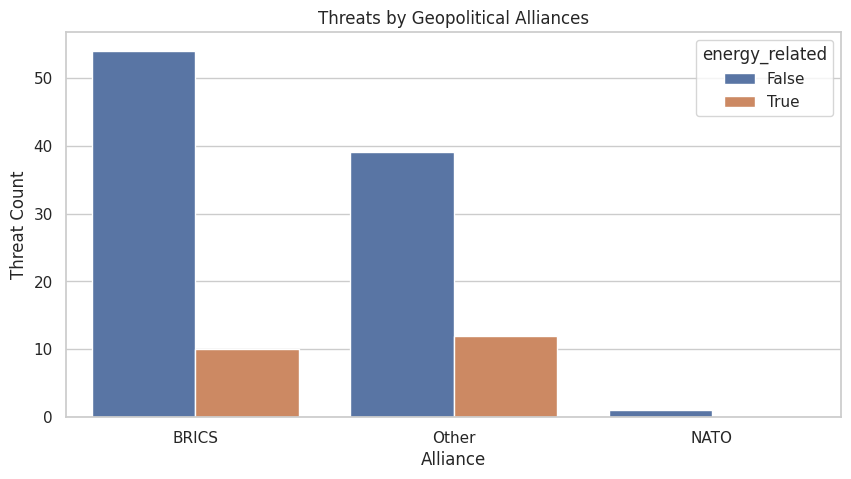

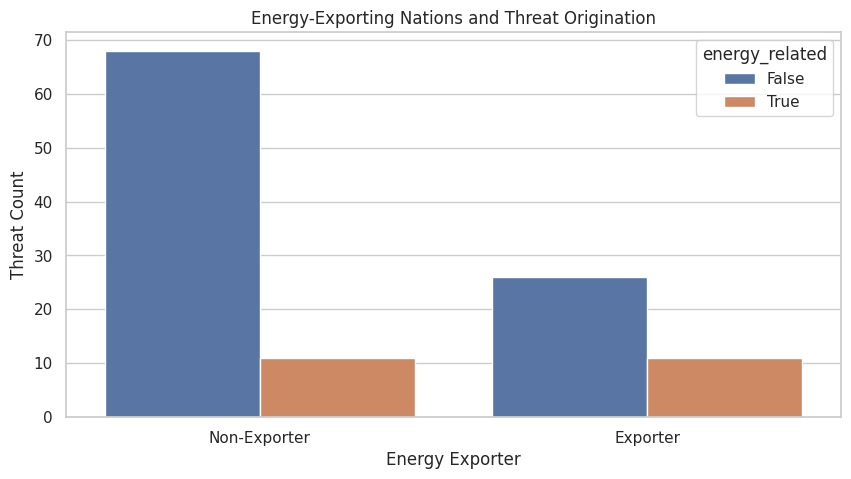

/scratch/slurm_tmpdir/job_1498628/ipykernel_2518685/3874616668.py:172: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_origin_counts = origin_counts.groupby("energy_related", group_keys=False).apply(


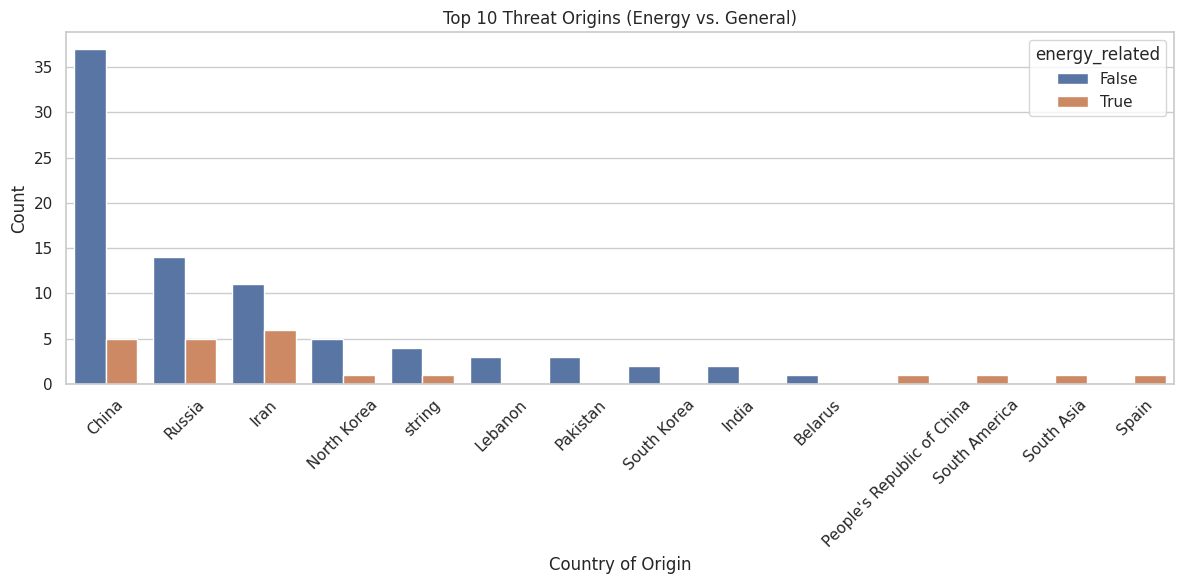

/scratch/slurm_tmpdir/job_1498628/ipykernel_2518685/3874616668.py:206: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_target_counts = target_counts.groupby("energy_related", group_keys=False).apply(


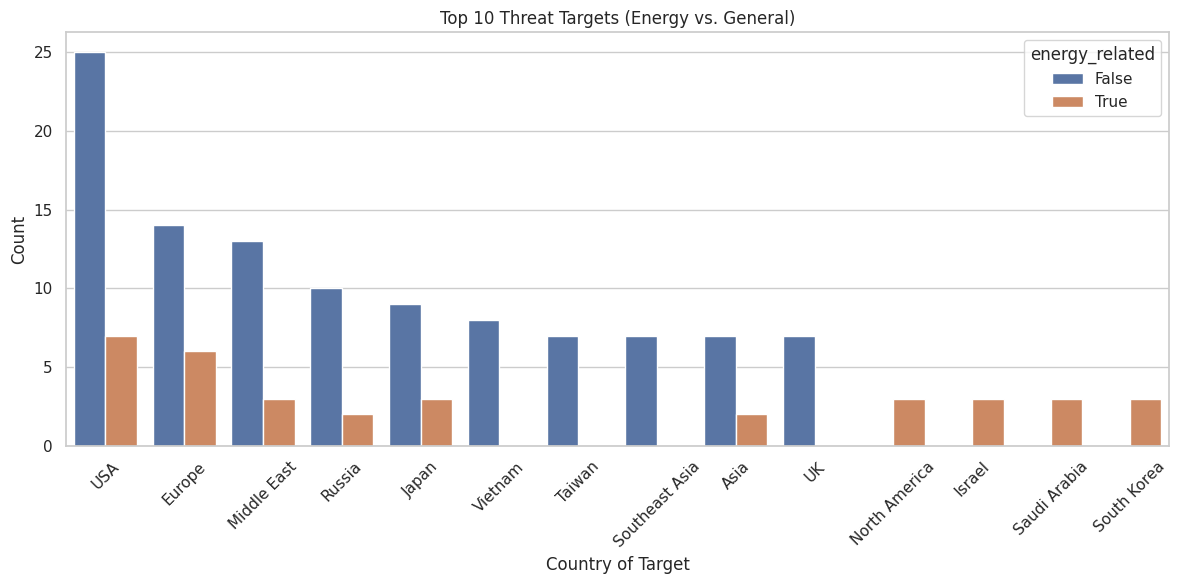

No date column found for timeline analysis.


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a seaborn style (optional)
sns.set_theme(style="whitegrid")

# Filepath to the processed JSON data
output_filepath = "MITRE_ATT_output.json"

# Standardized country names mapping
country_aliases = {
    "United States": "USA",
    "U.S.": "USA",
    "US": "USA",
    "U.S.A.": "USA",
    "America": "USA",
    "United Kingdom": "UK",
    "Great Britain": "UK",
}

# Country flag emojis mapping (or country codes used for flag lookup)
flag_emojis = {
    "USA": "US",
    "UK": "GB",
    "Russia": "RU",
    "Ukraine": "UA",
    "Israel": "IL",
    "Palestine": "PS",
    "China": "CN",
    "Taiwan": "TW"
}

# -----------------------------------------------------------------------------
# Helper functions
# -----------------------------------------------------------------------------

def load_parsed_data(filepath):
    """Load JSON data from a file. Returns an empty list on error."""
    try:
        with open(filepath, 'r') as f:
            return json.load(f)
    except (FileNotFoundError, json.JSONDecodeError) as e:
        print(f"Error loading parsed JSON: {e}")
        return []


def standardize_country_name(country):
    """Standardize country names using the country_aliases mapping."""
    return country_aliases.get(country, country)


def get_flag_emoji(country):
    """Return a flag emoji (or country code) based on the country name."""
    return flag_emojis.get(country, country)


def ensure_list_fields(data_item):
    """Ensure the data item has valid list entries for country fields."""
    if "energy_related" not in data_item:
        data_item["energy_related"] = False
    if "country_of_origin" not in data_item or not isinstance(data_item["country_of_origin"], list):
        data_item["country_of_origin"] = []
    if "country_of_target" not in data_item or not isinstance(data_item["country_of_target"], list):
        data_item["country_of_target"] = []


# -----------------------------------------------------------------------------
# Load and pre-process the data
# -----------------------------------------------------------------------------

data = load_parsed_data(output_filepath)

# Ensure every item has the necessary fields
for item in data:
    ensure_list_fields(item)


# -----------------------------------------------------------------------------
# Analysis functions
# -----------------------------------------------------------------------------

def analyze_geopolitical_alignments(data):
    """Analyze threats by geopolitical alliances."""
    alliances = {
        "NATO": ["USA", "UK", "Germany", "France", "Canada", "Poland"],
        "BRICS": ["China", "Russia", "India", "Brazil", "South Africa"],
    }
    
    df = pd.DataFrame(data)
    # Ensure energy_related is boolean
    df["energy_related"] = df["energy_related"].astype(bool)
    
    # Explode the country_of_origin column so that each row has a single country
    df["country_of_origin"] = df["country_of_origin"].apply(lambda x: x if isinstance(x, list) else [])
    df_exploded = df.explode("country_of_origin")
    
    # Standardize names and drop any rows with missing origin
    df_exploded["country_of_origin"] = df_exploded["country_of_origin"].apply(
        lambda x: standardize_country_name(x) if pd.notna(x) else x
    )
    df_exploded = df_exploded.dropna(subset=["country_of_origin"])
    df_exploded = df_exploded[df_exploded["country_of_origin"] != ""]
    
    # Determine alliance membership for each origin country
    df_exploded["alliance"] = df_exploded["country_of_origin"].apply(
        lambda x: next((a for a, members in alliances.items() if x in members), "Other")
    )
    
    plt.figure(figsize=(10, 5))
    order = df_exploded["alliance"].value_counts().index
    sns.countplot(data=df_exploded, x="alliance", hue="energy_related", order=order)
    plt.title("Threats by Geopolitical Alliances")
    plt.xlabel("Alliance")
    plt.ylabel("Threat Count")
    plt.show()


def analyze_energy_export_dependence(data):
    """Analyze threats with respect to energy-exporting countries."""
    energy_exporters = ["Russia", "Saudi Arabia", "Iran", "Venezuela", "USA", "Canada"]
    
    df = pd.DataFrame(data)
    df["energy_related"] = df["energy_related"].astype(bool)
    
    # Explode the origin column
    df["country_of_origin"] = df["country_of_origin"].apply(lambda x: x if isinstance(x, list) else [])
    df_exploded = df.explode("country_of_origin")
    
    df_exploded["country_of_origin"] = df_exploded["country_of_origin"].apply(
        lambda x: standardize_country_name(x) if pd.notna(x) else x
    )
    df_exploded = df_exploded.dropna(subset=["country_of_origin"])
    df_exploded = df_exploded[df_exploded["country_of_origin"] != ""]
    
    # Flag if the country is an energy exporter
    df_exploded["energy_exporter"] = df_exploded["country_of_origin"].apply(lambda x: x in energy_exporters)
    
    plt.figure(figsize=(10, 5))
    order = df_exploded["energy_exporter"].value_counts().index
    sns.countplot(data=df_exploded, x="energy_exporter", hue="energy_related", order=order)
    plt.title("Energy-Exporting Nations and Threat Origination")
    plt.xlabel("Energy Exporter")
    plt.ylabel("Threat Count")
    plt.xticks(ticks=[0, 1], labels=["Non-Exporter", "Exporter"])
    plt.show()


def analyze_threat_origins_targets(data):
    """Analyze and compare the origins and targets of threats for energy vs. general events."""
    df = pd.DataFrame(data)
    df["energy_related"] = df["energy_related"].astype(bool)
    
    # ---- Threat Origins ----
    df_origin = df.copy()
    df_origin["country_of_origin"] = df_origin["country_of_origin"].apply(lambda x: x if isinstance(x, list) else [])
    df_origin = df_origin.explode("country_of_origin")
    df_origin["country_of_origin"] = df_origin["country_of_origin"].apply(
        lambda x: standardize_country_name(x) if pd.notna(x) else x
    )
    df_origin = df_origin.dropna(subset=["country_of_origin"])
    df_origin = df_origin[df_origin["country_of_origin"] != ""]
    
    origin_counts = (
        df_origin.groupby(["country_of_origin", "energy_related"])
        .size()
        .reset_index(name="count")
    )
    # Get top 10 for each energy-related category
    top_origin_counts = origin_counts.groupby("energy_related", group_keys=False).apply(
        lambda grp: grp.sort_values(by="count", ascending=False).head(10)
    )
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=top_origin_counts,
        x="country_of_origin",
        y="count",
        hue="energy_related",
        order=top_origin_counts.sort_values("count", ascending=False)["country_of_origin"]
    )
    plt.title("Top 10 Threat Origins (Energy vs. General)")
    plt.xlabel("Country of Origin")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # ---- Threat Targets ----
    df_target = df.copy()
    df_target["country_of_target"] = df_target["country_of_target"].apply(lambda x: x if isinstance(x, list) else [])
    df_target = df_target.explode("country_of_target")
    df_target["country_of_target"] = df_target["country_of_target"].apply(
        lambda x: standardize_country_name(x) if pd.notna(x) else x
    )
    df_target = df_target.dropna(subset=["country_of_target"])
    df_target = df_target[df_target["country_of_target"] != ""]
    
    target_counts = (
        df_target.groupby(["country_of_target", "energy_related"])
        .size()
        .reset_index(name="count")
    )
    top_target_counts = target_counts.groupby("energy_related", group_keys=False).apply(
        lambda grp: grp.sort_values(by="count", ascending=False).head(10)
    )
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=top_target_counts,
        x="country_of_target",
        y="count",
        hue="energy_related",
        order=top_target_counts.sort_values("count", ascending=False)["country_of_target"]
    )
    plt.title("Top 10 Threat Targets (Energy vs. General)")
    plt.xlabel("Country of Target")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def analyze_conflict_related_threats(data):
    """
    Analyze threats related to ongoing conflicts using a timeline plot.
    This function looks for events where both the country of origin and target
    belong to a predefined conflict region and then plots the events chronologically.
    """
    conflict_regions = {
        "Russia-Ukraine": ["Russia", "Ukraine"],
        "Israel-Palestine": ["Israel", "Palestine"],
        "China-Taiwan": ["China", "Taiwan"]
    }
    
    df = pd.DataFrame(data)
    
    # Ensure the country fields are lists
    df["country_of_origin"] = df["country_of_origin"].apply(lambda x: x if isinstance(x, list) else [])
    df["country_of_target"] = df["country_of_target"].apply(lambda x: x if isinstance(x, list) else [])
    
    # Explode both origin and target so each row corresponds to a single pair
    df = df.explode("country_of_origin").explode("country_of_target")
    
    # Standardize the country names
    df["country_of_origin"] = df["country_of_origin"].apply(
        lambda x: standardize_country_name(x) if pd.notna(x) else x
    )
    df["country_of_target"] = df["country_of_target"].apply(
        lambda x: standardize_country_name(x) if pd.notna(x) else x
    )
    
    # Drop rows with missing country values and remove self-attacks
    df = df.dropna(subset=["country_of_origin", "country_of_target"])
    df = df[df["country_of_origin"] != df["country_of_target"]]
    
    # Determine the conflict region (if any) where both countries belong
    def get_conflict(row):
        for conflict, countries in conflict_regions.items():
            if row["country_of_origin"] in countries and row["country_of_target"] in countries:
                return conflict
        return None

    df["conflict"] = df.apply(get_conflict, axis=1)
    df = df.dropna(subset=["conflict"])
    
    # Convert date column to datetime (assumes a "date" field exists in the data)
    if "date" in df.columns:
        df["date"] = pd.to_datetime(df["date"], errors='coerce')
        df = df.dropna(subset=["date"]).sort_values(by="date")
    else:
        print("No date column found for timeline analysis.")
        return
    
    plt.figure(figsize=(12, 6))
    colors = {"Russia-Ukraine": "red", "Israel-Palestine": "blue", "China-Taiwan": "green"}
    # Define fixed y-axis positions for each conflict region
    y_positions = {"Russia-Ukraine": 1, "Israel-Palestine": 2, "China-Taiwan": 3}
    
    # Plot each event with a small random vertical offset to reduce overlap
    for _, row in df.iterrows():
        conflict = row["conflict"]
        y_offset = y_positions[conflict] + np.random.uniform(-0.2, 0.2)
        plt.scatter(row["date"], y_offset, color=colors.get(conflict, "gray"), alpha=0.7)
        
        # Retrieve flag information for origin and target
        flag_origin = get_flag_emoji(row["country_of_origin"])
        flag_target = get_flag_emoji(row["country_of_target"])
        plt.text(row["date"], y_offset, f"{flag_origin} → {flag_target}", fontsize=10, ha='center', va='center')
    
    plt.yticks(list(y_positions.values()), list(y_positions.keys()))
    plt.xlabel("Date")
    plt.ylabel("Conflict Region")
    plt.title("Chronological Order of Attacks in Conflicts (Using Flag Emojis)")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# -----------------------------------------------------------------------------
# Run all analyses
# -----------------------------------------------------------------------------

analyze_geopolitical_alignments(data)
analyze_energy_export_dependence(data)
analyze_threat_origins_targets(data)
analyze_conflict_related_threats(data)
